In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
#       Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
data = pd.read_csv('heart.csv')
data = data.rename(columns={'age':'Age', 'sex':'Sex', 'cp':'Chest_pain', 'trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                           'restecg':'ECG_results_rest', 'thalach':'Maximum_HR','exang':'Exercise_induced_agina','oldpeak':'ST_depression_by_exercise',
                           'ca':'no_major_vessels','thal':'Thalassemia_types','target':'Heart_atack','slope':'ST_slope'})
plt.style.use('ggplot')
data.head()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results_rest,Maximum_HR,Exercise_induced_agina,ST_depression_by_exercise,ST_slope,no_major_vessels,Thalassemia_types,Heart_atack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='Chest_pain', ylabel='count'>

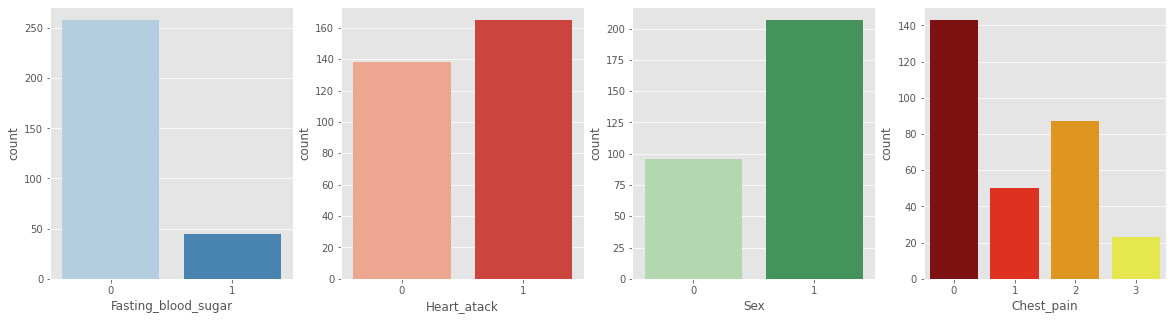

In [3]:
fig, axs=plt.subplots(ncols=4, figsize=(20,5))
sns.countplot(x='Fasting_blood_sugar', data=data, palette='Blues', ax=axs[0])
sns.countplot(x='Heart_atack', data=data, palette='Reds', ax=axs[1])
sns.countplot(x='Sex', data=data, palette='Greens', ax=axs[2])
sns.countplot(x='Chest_pain', data=data, palette='hot', ax=axs[3])
# 0 = Female, 1 = Male

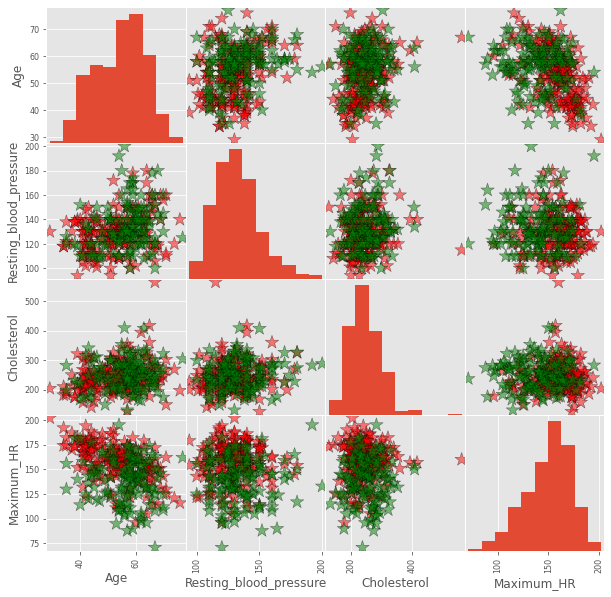

In [4]:
# Posibly Correlated columns
correlated = data[['Age', 'Resting_blood_pressure', 'Cholesterol','Maximum_HR']]
color = ['red' if i == 1 else 'green' for i in data.loc[:,'Heart_atack']]
pd.plotting.scatter_matrix(correlated,
                          c=color,
                          figsize=[10,10],
                          diagonal='hist',
                          alpha=0.5,
                          s = 200,
                          marker='*',
                          edgecolor='black')
plt.show()

### Predicting Heart Atacks with knn

In [5]:
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=3)
x, y = data.loc[:, data.columns != 'Heart_atack'], data['Heart_atack']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print(prediction, '\n', knn.score(x_test, y_test))

[0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1
 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1] 
 0.6263736263736264


Highest Test acc: 0.7032967032967034, K=20
[0.5824175824175825, 0.5054945054945055, 0.6263736263736264, 0.5494505494505495, 0.5934065934065934, 0.5494505494505495, 0.5604395604395604, 0.5934065934065934, 0.5934065934065934, 0.5494505494505495, 0.5934065934065934, 0.6043956043956044, 0.6153846153846154, 0.6373626373626373, 0.6373626373626373, 0.6703296703296703, 0.6593406593406593, 0.6593406593406593, 0.6703296703296703, 0.7032967032967034, 0.7032967032967034, 0.7032967032967034, 0.6593406593406593, 0.6703296703296703]


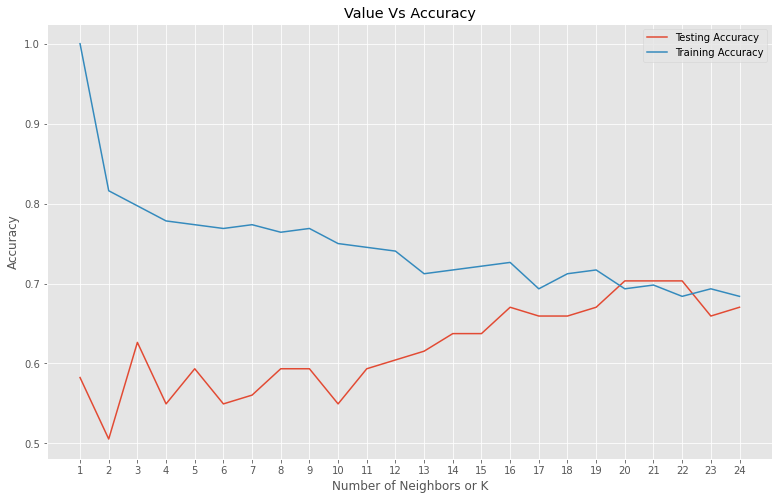

In [6]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy =[]
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(x_train, y_train)
    prediction_test = knn.predict(x_test)
    prediction_train = knn.predict(x_train)
    
 
    
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
print(f'Highest Test acc: {np.max(test_accuracy)}, K={1+test_accuracy.index(np.max(test_accuracy))}')
print(test_accuracy)
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.legend()
plt.title('Value Vs Accuracy')
plt.xlabel('Number of Neighbors or K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

Highest Test acc: 0.5164835164835165, K=2
[0.4835164835164835, 0.5164835164835165, 0.4945054945054945, 0.4725274725274725, 0.46153846153846156, 0.4835164835164835, 0.43956043956043955, 0.45054945054945056, 0.4835164835164835, 0.43956043956043955, 0.42857142857142855, 0.46153846153846156, 0.4725274725274725, 0.46153846153846156, 0.4945054945054945, 0.4945054945054945, 0.4725274725274725, 0.4835164835164835, 0.4945054945054945, 0.4725274725274725, 0.4835164835164835, 0.4945054945054945, 0.4945054945054945, 0.4945054945054945]


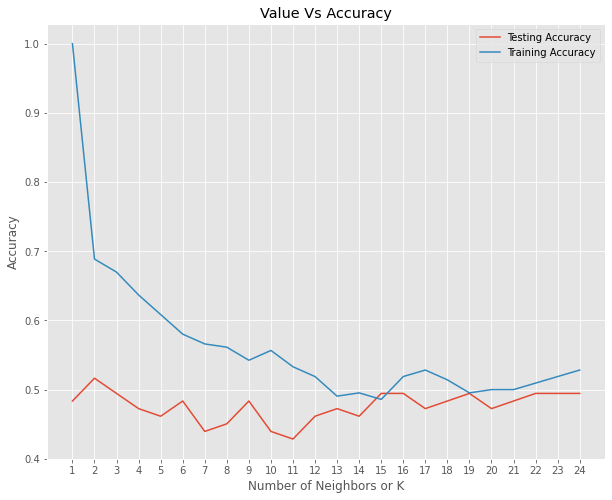

In [7]:
x, y = data.loc[:, data.columns != 'Chest_pain'], data['Chest_pain']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

train_accuracy = []
test_accuracy =[]
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(x_train, y_train)
    prediction_test = knn.predict(x_test)
    prediction_train = knn.predict(x_train)
    
 
    
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
print(f'Highest Test acc: {np.max(test_accuracy)}, K={1+test_accuracy.index(np.max(test_accuracy))}')
print(test_accuracy)

plt.figure(figsize=[10,8])
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.legend()
plt.title('Value Vs Accuracy')
plt.xlabel('Number of Neighbors or K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

x, y = data.loc[:, data.columns != 'Heart_atack'], data['Heart_atack']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

random_state = np.arange(1,25)
prediction = []

train_accuracy = []
test_accuracy =[]

for i, r_s in enumerate(random_state):
    hr_model = RandomForestClassifier(random_state=r_s)
    hr_model.fit(x_train, y_train)
    prediction.append(hr_model.score(x_test, y_test))
    
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
print(f'Hisghest prediction, {np.max(prediction)}, Random State: {1+prediction.index(np.max(prediction))}')

Hisghest prediction, 0.8021978021978022, Random State: 12


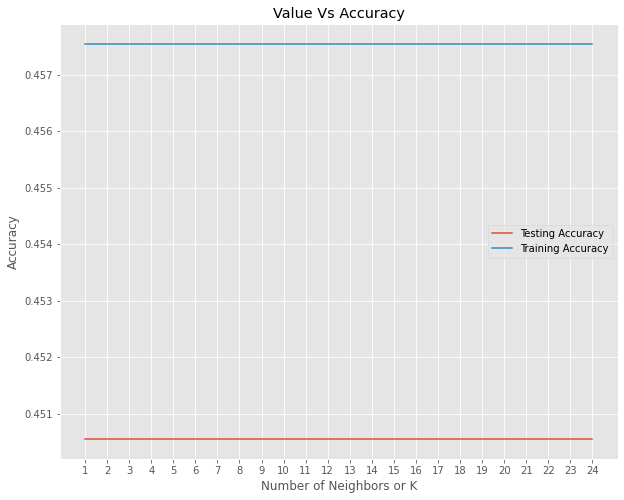

In [12]:
plt.figure(figsize=[10,8])
plt.plot(random_state, test_accuracy, label='Testing Accuracy')
plt.plot(random_state, train_accuracy, label='Training Accuracy')
plt.legend()
plt.title('Value Vs Accuracy')
plt.xlabel('Number of Neighbors or K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()